In [ ]:
!gdown 1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb

Downloading...
From (original): https://drive.google.com/uc?id=1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb
From (redirected): https://drive.google.com/uc?id=1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb&confirm=t&uuid=b3919a31-96f7-44fe-9c2a-152ef8aa58d8
To: /content/creditcard_2023.csv
100% 325M/325M [00:03<00:00, 89.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/creditcard_2023.csv')

In [ ]:
#checking the data and see if there are any categorical columns that need to be encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

DATA CLEANING

In [ ]:
#check if there any null values in any columns

null_counts = data.isnull().sum()
null_counts

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#see duplicated rows
data.duplicated().sum()

0

<Axes: >

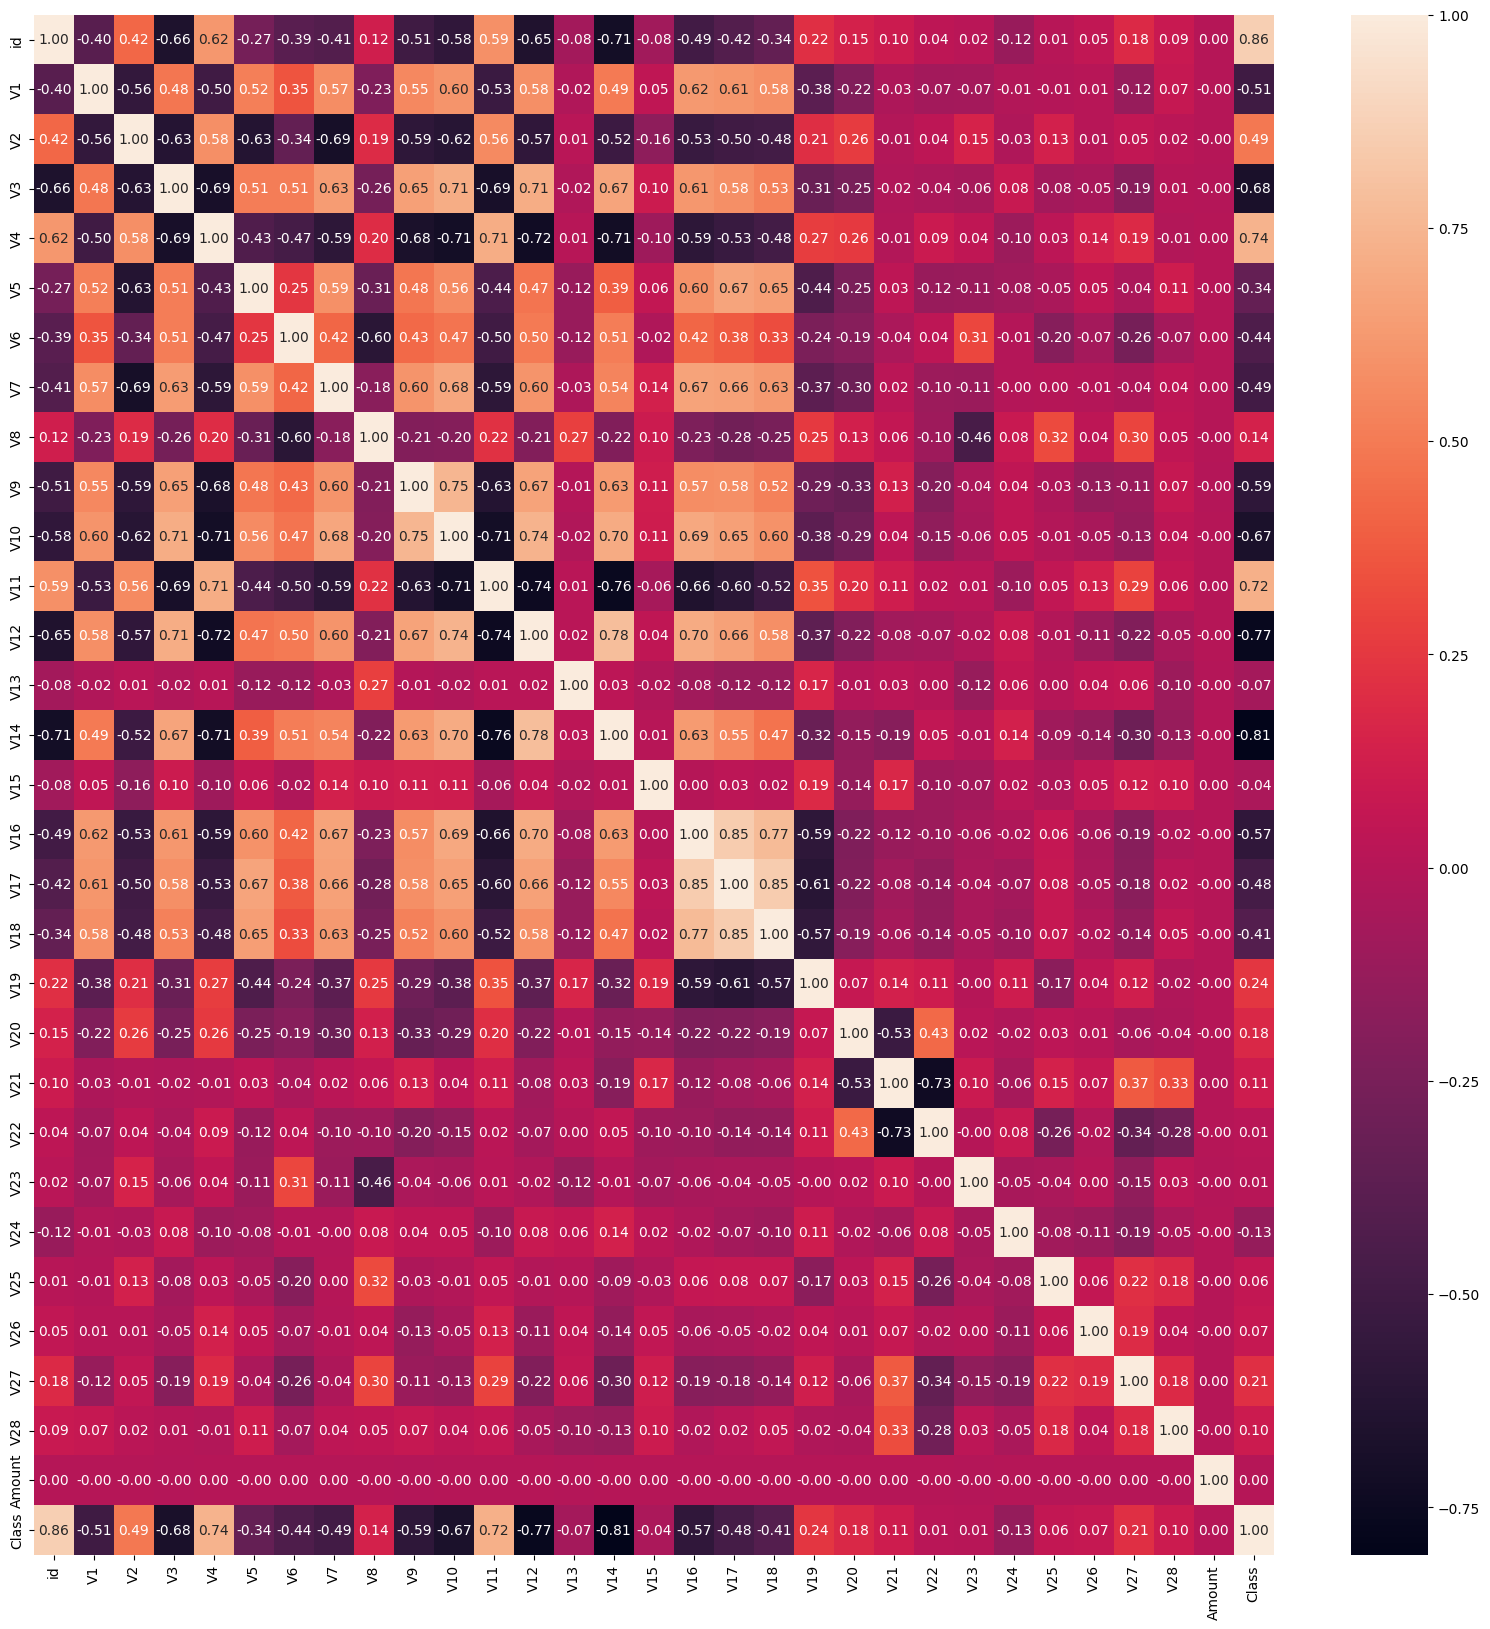

In [ ]:
#correlation matrix or heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})


In [ ]:
#check if there are any outliers in any columns
#using IQR method to calculate column that have the outliers

#for each column in the dataset
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)

    #winsorize techique by subsitute the outlier with the smallest or largest value that doesn't consider as outliers
    data[column] = np.where(data[column] < lower_range, lower_range, data[column])
    data[column] = np.where(data[column] > upper_range, upper_range, data[column])
    outlier_column = (data[column] < lower_range) |  (data[column] > upper_range)
    #print the column name with the outliers
    if outlier_column.any():
      print(f"column with outlier: {column}")



DROPPING FEATURE WITH HIGH CORRELATION TO PREVENT OVERFITTING

In [ ]:
x = data.drop(['id','Class'],axis=1)
y = data.Class

FEATURE SCALING: STANDARDIZATION

In [ ]:
sc = StandardScaler()

DATA TRANSFORMATION

In [ ]:
x_scaled = sc.fit_transform(x)

In [ ]:
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns)

HANDLE IMBALANCED DATA IF ANY

In [ ]:
y.value_counts() #check if there frequencies between two classes is imbalanced

Class
0.0    284315
1.0    284315
Name: count, dtype: int64

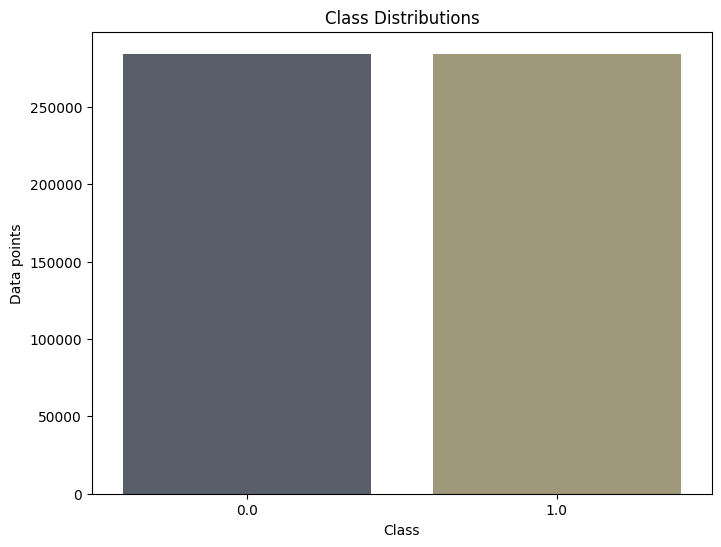

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=y, palette= "cividis")
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Class Distributions')
plt.show()



*Based* on the result, the frequency is balanced between the two classes

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=15,stratify= y)

# Modlels


## **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns

In [ ]:
# create a K-Nearest neighbor models for various k
trained_models = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_rocs = []
confusion_matrices = []
for i in range(1, 40):
    # knn model with i neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    #fit the model
    knn.fit(x_train, y_train)
    #make predictions
    y_pred = knn.predict(x_test)

    #evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    auc_roc = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])

    trained_models.append(knn)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_rocs.append(auc_roc)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    print("Moden evaluated for k =", i)
    print(f'accuracy: {accuracy}, precision: {precision}, f1 score: {f1}, auc roc: {auc_roc}')

Moden evaluated for k = 1
accuracy: 0.9991629032484981, precision: 0.9991641205739447, f1 score: 0.9991629027381351, auc roc: 0.9991629032484982
Moden evaluated for k = 2
accuracy: 0.9991629032484981, precision: 0.9991639111156897, f1 score: 0.9991629028259503, auc roc: 0.9992260162428527
Moden evaluated for k = 3
accuracy: 0.9985298048650093, precision: 0.9985340330393269, f1 score: 0.9985298017477425, auc roc: 0.9992541226754309
Moden evaluated for k = 4
accuracy: 0.9985649769974254, precision: 0.9985689243196385, f1 score: 0.9985649741570412, auc roc: 0.999289180897622
Moden evaluated for k = 5
accuracy: 0.9979037409080038, precision: 0.9979124928198161, f1 score: 0.9979037316963673, auc roc: 0.9993452719352486


Accuracy over increasing k values

In [ ]:
sns.set_style("whitegrid")
k_range = range(1, 40)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot accuracy curve
axes[0, 0].plot(k_range, accuracies, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy over varying k values")
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel("Accuracy")

# Plot precision curve
axes[0, 1].plot(k_range, precisions, marker='o', linestyle='-', color='g')
axes[0, 1].set_title("Precision over varying k values")
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel("Precision")

# Plot recall curve
axes[1, 0].plot(k_range, recalls, marker='o', linestyle='-', color='r')
axes[1, 0].set_title("Recall over varying k values")
axes[1, 0].set_xlabel("k")
axes[1, 0].set_ylabel("Recall")

# Plot F1 score curve
axes[1, 1].plot(k_range, f1_scores, marker='o', linestyle='-', color='y')
axes[1, 1].set_title("F1 Score over varying k values")
axes[1, 1].set_xlabel("k")
axes[1, 1].set_ylabel("F1 Score")

# Plot AUC-ROC curve
axes[2, 0].plot(k_range, auc_rocs, marker='o', linestyle='-', color='m')
axes[2, 0].set_title("AUC-ROC over varying k values")
axes[2, 0].set_xlabel("k")
axes[2, 0].set_ylabel("AUC-ROC")
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

### **Further exploring k = 2**

In [ ]:
#confusion matrix
knn_k2 = trained_models[1]
knn_k2_cm = confusion_matrices[1]
sns.heatmap(knn_k2_cm, annot=True, fmt="d")
plt.show()

In [ ]:
#confusion matrix
prob = knn_k2.predict_proba(x_test)
prob = prob[:, 1]
fper, tper, _ = roc_curve(y_test, prob)
auc_scr = auc(fper, tper)

plt.figure(figsize=(8, 6))
plt.plot(fper, tper, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_scr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()